Deep Learning using Rectified Linear Units
===

## Overview

In this notebook, we explore the performance of a neural net with varying activation functions on an image classification task.

We load our dependencies.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from neural_net import NeuralNet, loss_fn, train_step, train

We set up the GPU memory growth.

In [2]:
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

We set the random seeds for reproducibility.

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

We set the batch size, the number of epochs, and the number of units per layer.

In [4]:
batch_size = 512
epochs = 300
neurons = [512, 512]

## Data Preparation

We load the MNIST dataset.

In [5]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

We scale the images.

In [6]:
train_features = train_features.astype('float32').reshape(-1, 784) / 255.
test_features = test_features.astype('float32').reshape(-1, 784) / 255.

We one-hot encode labels.

In [7]:
train_labels = tf.one_hot(train_labels, 10)
test_labels = tf.one_hot(test_labels, 10)

We create a `tf.data.Dataset` object for the training dataset.

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
dataset = dataset.prefetch(4096).shuffle(4096).batch(batch_size, True)

## Model

We use a `NeuralNet` class that consists of two hidden layers.

### Logistic-based Model

We define a 2-layer NN with Logistic activation function.

In [13]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.sigmoid,
    initializer='glorot_uniform',
    num_classes=10
)

We train our model for 300 epochs.

In [14]:
logistic_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 219.92889404296875, mean accuracy = 0.6262186169624329
epoch 100/300 : mean loss = 125.63847351074219, mean accuracy = 0.7658587098121643
epoch 150/300 : mean loss = 83.90591430664062, mean accuracy = 0.8242354393005371
epoch 200/300 : mean loss = 65.95451354980469, mean accuracy = 0.8540331125259399
epoch 250/300 : mean loss = 56.727027893066406, mean accuracy = 0.870559573173523
epoch 300/300 : mean loss = 51.205196380615234, mean accuracy = 0.8803919553756714


We produce predictions for the test data.

In [15]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [16]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [17]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.8871999979019165


### TanH-based Model

We define a 2-layer NN with Hyperbolic Tangent activation function.

In [18]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.tanh,
    initializer='glorot_uniform',
    num_classes=10
)

We train our model for 300 epochs.

In [19]:
tanh_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 41.1085090637207, mean accuracy = 0.8992888331413269
epoch 100/300 : mean loss = 34.8826789855957, mean accuracy = 0.9150474071502686
epoch 150/300 : mean loss = 31.67683982849121, mean accuracy = 0.92311030626297
epoch 200/300 : mean loss = 29.215179443359375, mean accuracy = 0.9298544526100159
epoch 250/300 : mean loss = 27.13260841369629, mean accuracy = 0.9344785213470459
epoch 300/300 : mean loss = 25.023637771606445, mean accuracy = 0.939987301826477


We produce predictions for the test data.

In [20]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [21]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [22]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.9387000203132629


### ReLU-based Model

We define a 2-layer NN with ReLU activation function.

In [23]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.relu,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [24]:
relu_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 37.91804504394531, mean accuracy = 0.9058660268783569
epoch 100/300 : mean loss = 28.591310501098633, mean accuracy = 0.9302550554275513
epoch 150/300 : mean loss = 23.43661117553711, mean accuracy = 0.943175733089447
epoch 200/300 : mean loss = 19.79481315612793, mean accuracy = 0.9521400928497314
epoch 250/300 : mean loss = 17.128997802734375, mean accuracy = 0.9587673544883728
epoch 300/300 : mean loss = 15.156329154968262, mean accuracy = 0.9637419581413269


We produce predictions for the test data.

In [25]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [26]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [27]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.9607999920845032


### Leaky ReLU-based Model

We define a 2-layer NN with Leaky ReLU activation function.

In [28]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.leaky_relu,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [29]:
lrelu_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 38.261756896972656, mean accuracy = 0.9059996008872986
epoch 100/300 : mean loss = 29.883636474609375, mean accuracy = 0.927200198173523
epoch 150/300 : mean loss = 25.318262100219727, mean accuracy = 0.9387853741645813
epoch 200/300 : mean loss = 22.130746841430664, mean accuracy = 0.9464309811592102
epoch 250/300 : mean loss = 19.44657325744629, mean accuracy = 0.9531416893005371
epoch 300/300 : mean loss = 17.38762664794922, mean accuracy = 0.958650529384613


We produce predictions for the test data.

In [30]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [31]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [32]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.9553999900817871


### Softplus-based Model

We define a 2-layer NN with Softplus activation function.

In [33]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.softplus,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [34]:
softplus_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 44.91297149658203, mean accuracy = 0.8903579115867615
epoch 100/300 : mean loss = 37.71559143066406, mean accuracy = 0.9074686169624329
epoch 150/300 : mean loss = 34.804866790771484, mean accuracy = 0.9156650900840759
epoch 200/300 : mean loss = 32.73615264892578, mean accuracy = 0.9212907552719116
epoch 250/300 : mean loss = 31.295869827270508, mean accuracy = 0.9249966740608215
epoch 300/300 : mean loss = 29.98644256591797, mean accuracy = 0.9279513955116272


We produce predictions for the test data.

In [35]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [36]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [37]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.9282000064849854


### ELU-based Model

We define a 2-layer NN with ELU activation function.

In [38]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.elu,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [39]:
elu_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 38.46513748168945, mean accuracy = 0.9060162901878357
epoch 100/300 : mean loss = 31.891250610351562, mean accuracy = 0.9221253991127014
epoch 150/300 : mean loss = 27.939388275146484, mean accuracy = 0.9324585795402527
epoch 200/300 : mean loss = 24.76047706604004, mean accuracy = 0.9414229393005371
epoch 250/300 : mean loss = 22.108375549316406, mean accuracy = 0.9475494027137756
epoch 300/300 : mean loss = 19.78851890563965, mean accuracy = 0.9525073170661926


We produce predictions for the test data.

In [40]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [41]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [42]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.9502000212669373


## Training Performance

We lay down the training performance of each model.

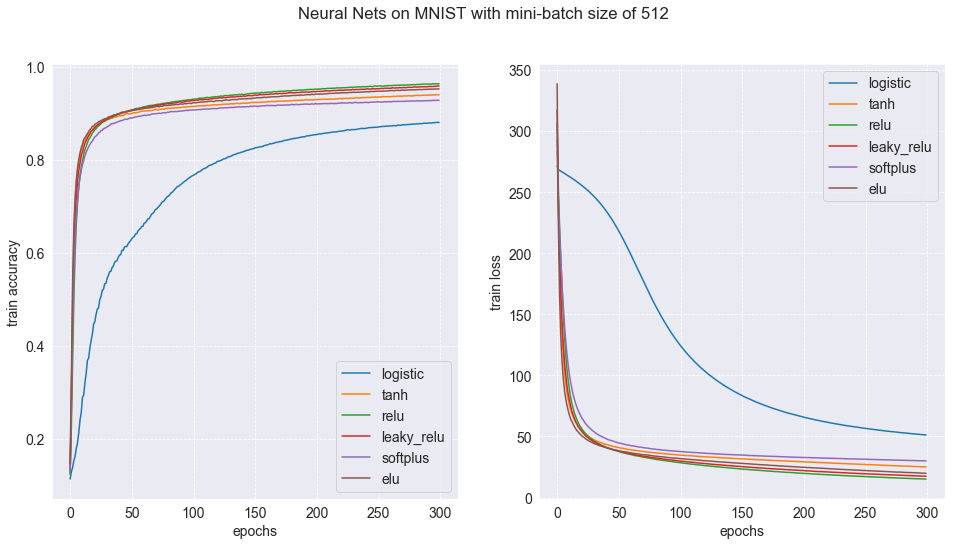

In [43]:
sns.set_style('dark', {'grid.linestyle': '--'})
plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 14})

plt.subplot(121)
plt.plot(range(len(logistic_performance[0])), logistic_performance[0], label='logistic')
plt.plot(range(len(tanh_performance[0])), tanh_performance[0], label='tanh')
plt.plot(range(len(relu_performance[0])), relu_performance[0], label='relu')
plt.plot(range(len(lrelu_performance[0])), lrelu_performance[0], label='leaky_relu')
plt.plot(range(len(softplus_performance[0])), softplus_performance[0], label='softplus')
plt.plot(range(len(elu_performance[0])), elu_performance[0], label='elu')
plt.xlabel('epochs')
plt.ylabel('train accuracy')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(122)
plt.plot(range(len(logistic_performance[1])), logistic_performance[1], label='logistic')
plt.plot(range(len(tanh_performance[1])), tanh_performance[1], label='tanh')
plt.plot(range(len(relu_performance[1])), relu_performance[1], label='relu')
plt.plot(range(len(lrelu_performance[1])), lrelu_performance[1], label='leaky_relu')
plt.plot(range(len(softplus_performance[1])), softplus_performance[1], label='softplus')
plt.plot(range(len(elu_performance[1])), elu_performance[1], label='elu')
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.legend(loc='upper right')
plt.grid()

plt.suptitle('Neural Nets on MNIST with mini-batch size of 512')
plt.savefig('mnist_experiments_512.png', dpi=300)
plt.show()